# Exercise 1
Use the code below to get started:

In [1]:
import pandas as pd
gdppercap = pd.Series([34605, 34493, 12393, 44200, 10041,
                       58138, 4709, 49284, 10109, 42536],
                      index=['Bahrain', 'Belgium', 'Bulgaria',
                             'Ireland', 'Macedonia', 'Norway',
                             'Paraguay', 'Singapore',
                             'South Africa', 'Switzerland']
                      )

# Exercise 2
Find the mean, median, minimum and maximum values of GDP per capita in this data.

In [3]:
gdppercap.describe()

count       10.000000
mean     30050.800000
std      19170.095217
min       4709.000000
25%      10680.000000
50%      34549.000000
75%      43784.000000
max      58138.000000
dtype: float64

In [7]:
gdppercap.median()

34549.0

In [15]:
# (another option to get the median)
import numpy as np
np.percentile(gdppercap, 50)

34549.0

# Exercise 3
Programmatically, determine which country in our data has the highest income per capita, and which has the lowest income per capita. <br>
Hint: Country names form the index for this Series, so to get country names you’ll need to access the index.

In [22]:
gdppercap.sort_values()

Paraguay         4709
Macedonia       10041
South Africa    10109
Bulgaria        12393
Belgium         34493
Bahrain         34605
Switzerland     42536
Ireland         44200
Singapore       49284
Norway          58138
dtype: int64

In [20]:
# Lowest GDP
gdppercap.sort_values().iloc[:1]

Paraguay    4709
dtype: int64

In [21]:
# Highest DGP
gdppercap.sort_values().iloc[-1:]

Norway    58138
dtype: int64

# Exercise 4
Get Python to print out the names of all the countries that have GDP per capitas less than $20,000.

In [25]:
cond = gdppercap < 20000
gdppercap[cond].sort_values()

Paraguay         4709
Macedonia       10041
South Africa    10109
Bulgaria        12393
dtype: int64

# Exercise 5
Get Python to print out the GDP per capita of Switzerland

In [26]:
gdppercap['Switzerland']

42536

# Exercise 6

Calculate the Gini coefficient for our income data. (Formula provided in the exercise page)

**HINT 1**: Be careful with 0-indexing! Python counts from 0, but mathematical formulas count from 1!

**HINT 2**: I’m gonna make you calculate Gini coefficients again later, so maybe you should write a function to do this and make life easier later?

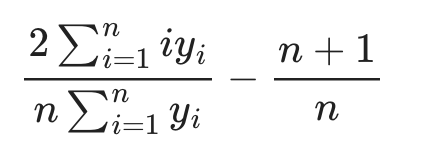

In [45]:
def calculate_gini(input_series):
    input_copy = input_series.copy()
    # Prepare the data
    input_df = input_copy.sort_values().reset_index().reset_index()
    n = len(input_copy)
    input_df.columns = ['i','country','y']
    input_df['i'] += 1
    # Calculate Gini
    parte1_num = 2*np.sum(input_df['i']*input_df['y'])
    parte1_den = n*np.sum(input_df['y'])
    part2 = (n+1)/n
    gini = parte1_num/parte1_den - part2
    
    return gini

In [46]:
gini = calculate_gini(gdppercap)
gini

0.3382798461272245

# Exercise 7
Using this data on average growth rates in GDP per capita, and assuming growth rates from 2000 to 2018 continue into the future, estimate what our Gini Coefficient may look like in 2025 (remembering that income in our data is from 2008, so we’re extrapolating ahead 17 years)?

In [47]:
avg_growth = pd.Series([-0.29768835, 0.980299584, 4.52991925,
                        3.686556736, 2.621416804, 0.775132075,
                        2.015489468, 3.345793635, 1.349993318,
                        0.982775018],
                        index=['Bahrain', 'Belgium', 'Bulgaria',
                               'Ireland', 'Macedonia', 'Norway',
                               'Paraguay', 'Singapore',
                               'South Africa', 'Switzerland']
                      )

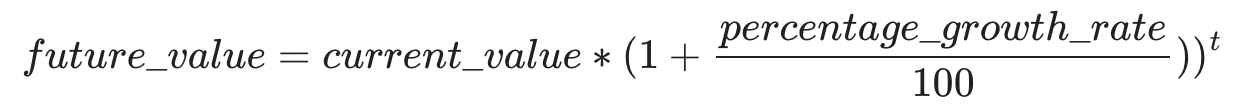

In [55]:
future_gdppercap = gdppercap * (1 + avg_growth/100)**17

In [56]:
future_gdppercap

Bahrain         32894.836013
Belgium         40714.968220
Bulgaria        26318.849643
Ireland         81790.706907
Macedonia       15589.172902
Norway          66292.970514
Paraguay         6610.779784
Singapore       86235.012247
South Africa    12697.303814
Switzerland     50229.720787
dtype: float64

In [57]:
future_gini = calculate_gini(future_gdppercap)
future_gini

0.3656264991306193

<AxesSubplot:>

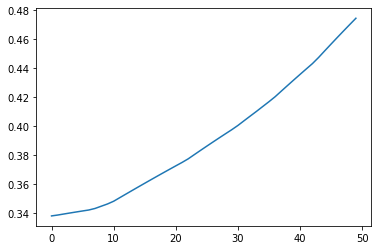

In [61]:
# EXTRA: Using the same growth numbers how would the next 50 years look like?
gini_values = []
for i in range(50):
    gini_values.append(calculate_gini(gdppercap * (1 + avg_growth/100)**i))

pd.Series(gini_values).plot()

# Exercise 8
Interpret your result – does it seem to imply that we are seeing covergence or not?

A: Yes, the Gini score looks to be improving